In [2]:
from wgan import WGAN
from matplotlib import pyplot as plt
import numpy as np

In [3]:
w = WGAN(digits=[0, 1, 5])

In [9]:
w.iterate = 500

In [ ]:
w.train()

<h2>Loss</h2>

In [ ]:
plt.plot(w.losses[:2500])
plt.xlabel("Iterations", fontsize='large')
plt.ylabel("Loss", fontsize='large')
plt.rcParams["figure.figsize"] = (10,5)
#plt.savefig("images/loss2500.png")

<h2>Interpolation</h2>

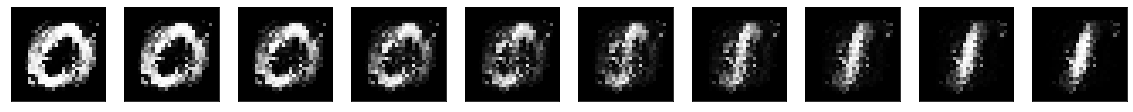

In [30]:
z = np.random.normal(0, 1, (1, w.g.latent))
imi = w.g(z)
k = np.random.normal(0, 1, (1, w.g.latent))
imj = w.g(k)

diff = z - k

ims = []
for i in range(10):
    ims.append(w.g(k + diff*i/10)[0, :, :, 0])

def plot_images(images, cols=3, cmap='gray'):
    rows = (len(images) + cols - 1) / cols
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])

    plt.show()

plot_images(ims, cols=10)

In [ ]:
ims = []
zs = []
for _ in range(9):
    z = np.random.normal(0, 1, (1, w.g.latent))
    imi = w.g(z)
    ims.append(imi)
    zs.append(z)
ims = np.array(ims)[:, 0, :, :, 0]
zs = np.array(zs)

plot_images(ims, cols=3)

In [18]:
plt.rcParams["figure.figsize"] = (20,20)

In [19]:
z = zs[0]
k = zs[8]

In [20]:
diff = z - k

inter = []
for i in range(10):
    inter.append(w.g((k + diff*i/10)).reshape(28, 28))
    
def plot_images(images, cols=3, cmap='gray'):
    rows = (len(images) + cols - 1) / cols
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])

    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)

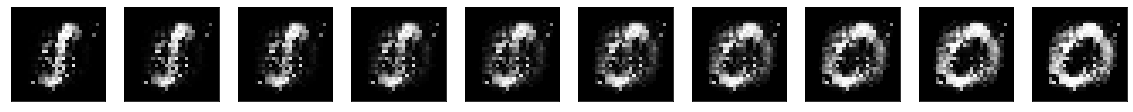

In [21]:
plot_images(inter, cols=10)